# Relation of global ev sales and government policies

## Importing required libraries

%matplotlib notebook

In [108]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import stats

In [109]:
# entering reseources
path_file1= "region_ev_policies.csv"
path_file2= "IEA-EV-data.csv"

In [110]:
# variables to read csv file
df1 = pd.read_csv(path_file1)
df2 = pd.read_csv(path_file2)

In [158]:
df1.head()

,Unnamed: 0,policies,no. of policies,evi member
0,Australia,False,0,False
1,Belgium,True,1,True
2,Brazil,True,2,False
3,Canada,True,8,True
4,Chile,True,5,True


In [159]:
df2.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,sales,49.00
1,Australia,Historical,EV stock,Cars,BEV,2011,stock,49.00
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.01
3,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00
4,Australia,Historical,EV stock share,Cars,EV,2012,percent,0.00


In [113]:
#renaming the coloumn name so can merge the two datasets
df1.columns

Index(['Unnamed: 0', 'policies', 'no. of policies', 'evi member'], dtype='object')

In [160]:
#renaming the columns
df1_n = df1.rename(columns={"Unnamed: 0": "region"})
df1_n.head() 

,region,policies,no. of policies,evi member
0,Australia,False,0,False
1,Belgium,True,1,True
2,Brazil,True,2,False
3,Canada,True,8,True
4,Chile,True,5,True


In [115]:
#filtered the data and setting the param
filtered_df2=df2.loc[(df2['category']=='Historical') & (df2['parameter'] == 'EV sales') & (df2["region"] != "World") & (df2["region"] !="Rest of the world")]
filtered_df2

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,sales,49.0
7,Australia,Historical,EV sales,Cars,PHEV,2012,sales,80.0
9,Australia,Historical,EV sales,Cars,BEV,2012,sales,173.0
10,Australia,Historical,EV sales,Cars,BEV,2013,sales,191.0
12,Australia,Historical,EV sales,Cars,PHEV,2013,sales,102.0
...,...,...,...,...,...,...,...,...
6421,USA,Historical,EV sales,Cars,BEV,2019,sales,241912.0
6442,USA,Historical,EV sales,Cars,BEV,2020,sales,231088.0
6443,USA,Historical,EV sales,Cars,PHEV,2020,sales,64311.0
6488,USA,Historical,EV sales,Cars,PHEV,2021,sales,164824.0


In [116]:
#fltering the data with region and value
fil_rv = filtered_df2[["region", "value"]]
fil_rv.head()

,region,value
0,Australia,49.0
7,Australia,80.0
9,Australia,173.0
10,Australia,191.0
12,Australia,102.0


In [117]:
# grouping the data according to region and adding the values of ev car sales over the period of 2011 to 2021
total_df = fil_rv.groupby(['region'])
total_df

In [118]:
# taking total sum of ev sales from 2011 to 2022
total_df_value = total_df.sum()
total_df_value.head()

,value
region,
Australia,47744.0
Belgium,185382.0
Brazil,12818.0
Canada,288757.7
Chile,1465.0


In [119]:
#merging the ev related data and no. of policies by the country
merge_sales_incentive = pd.merge(total_df_value, df1_n, on="region")
merge_sales_incentive.head()

,region,value,policies,no. of policies,evi member
0,Australia,47744.0,False,0,False
1,Belgium,185382.0,True,1,True
2,Brazil,12818.0,True,2,False
3,Canada,288757.7,True,8,True
4,Chile,1465.0,True,5,True


In [120]:
# see the datatypes
merge_sales_incentive.dtypes

region              object
value              float64
policies            object
no. of policies      int64
evi member          object
dtype: object

In [121]:
#setting the x and y values for scatter plot
y_values1 = (merge_sales_incentive['value'].sort_values(ascending=True).round())
tick_locations = [value for value in y_values1]
y_values1

4        1465.0
23       1748.0
10      10446.0
16      11538.0
2       12818.0
12      22080.0
11      25693.0
18      34492.0
21      39424.0
0       47744.0
7       68389.0
22      80398.0
6      127214.0
26     143807.0
24     166420.0
1      185382.0
13     247078.0
20     253263.0
3      288758.0
15     298553.0
25     359949.0
14     377213.0
17     408838.0
19     596519.0
28     781272.0
8      794257.0
9     1425658.0
27    2373985.0
5     9003350.0
Name: value, dtype: float64

In [122]:
#sorting the x values
x_values1 = (merge_sales_incentive['no. of policies'].sort_values(ascending=True))
x_values1.dtypes

dtype('int64')

<IPython.core.display.Javascript object>


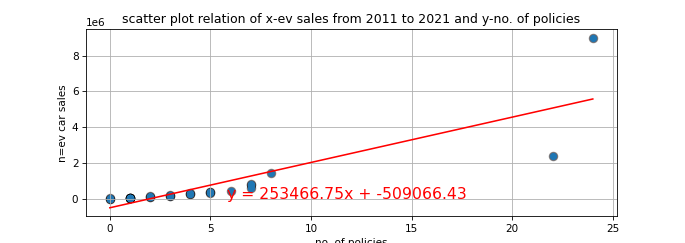

In [123]:
# plotting the scatter plot and measuring the r value
plt.figure(figsize=(12, 5))
plt.title("scatter plot relation of x-ev sales from 2011 to 2021 and y-no. of policies")
plt.xlabel("no. of policies")
plt.ylabel("ev car sales")

plt.scatter(x_values1, y_values1, marker="o", color="red", edgecolor='black', linewidth=2, alpha=0.5, s=50)
plt.savefig("output/sct_ev_pol.png")
plt.grid()



In [124]:
x_values1 = (merge_sales_incentive['no. of policies'].sort_values(ascending=True))
y_values1 = (merge_sales_incentive['value'].sort_values(ascending=True).round())
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values1, y_values1)
regress_values = x_values1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values1,y_values1)
plt.plot(x_values1,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('no. of policies')
plt.ylabel('n=ev car sales')
plt.savefig("output/sct_ev_pol2.png")
plt.show()
print(f'The r-value is: {rvalue}')    

The r-value is: 0.8481628620034961


In [125]:
#filtering the data for only countries have policy>0, to see the trend of line regress stays the same
merge_sales_incentive_fil = merge_sales_incentive.loc[(merge_sales_incentive != 0).all(axis = 1), :]
merge_sales_incentive_fil

,region,value,policies,no. of policies,evi member
1,Belgium,185382.00,True,1,True
3,Canada,288757.70,True,8,True
4,Chile,1465.00,True,5,True
5,China,9003349.80,True,24,True
6,Denmark,127214.00,True,3,True
7,Finland,68389.00,True,4,True
8,France,794257.16,True,5,True
9,Germany,1425658.00,True,4,True
10,Greece,10446.00,True,1,True
11,Iceland,25693.00,True,1,True


In [126]:
# resetting the index
merge_sales_incentive_fil = merge_sales_incentive_fil.reset_index(drop=True, inplace=False)
merge_sales_incentive_fil

,region,value,policies,no. of policies,evi member
0,Belgium,185382.00,True,1,True
1,Canada,288757.70,True,8,True
2,Chile,1465.00,True,5,True
3,China,9003349.80,True,24,True
4,Denmark,127214.00,True,3,True
5,Finland,68389.00,True,4,True
6,France,794257.16,True,5,True
7,Germany,1425658.00,True,4,True
8,Greece,10446.00,True,1,True
9,Iceland,25693.00,True,1,True


In [127]:
# setting the x and y values
x_values = (merge_sales_incentive_fil['no. of policies'].sort_values(ascending=True))

In [154]:
y_values = (merge_sales_incentive_fil['value'].sort_values(ascending=True).round())

<IPython.core.display.Javascript object>


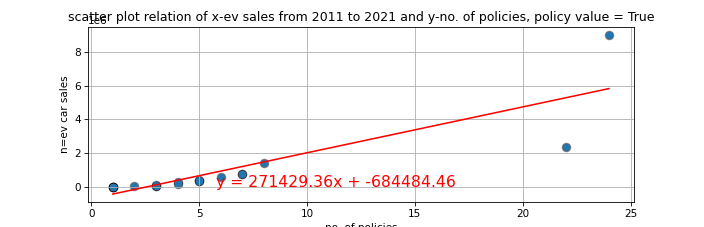

In [155]:
plt.figure(figsize=(12, 5))
plt.title("scatter plot relation of x-ev sales from 2011 to 2021 and y-no. of policies, policy value = True")
plt.xlabel("no. of policies")
plt.ylabel("ev car sales")

plt.scatter(x_values, y_values, marker="o", color="red", edgecolor='black', linewidth=2, alpha=0.5, s=50)
plt.grid()
plt.savefig("output/sct_ev_pol_v_t.png")


In [156]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('no. of policies')
plt.ylabel('n=ev car sales')
plt.savefig("output/sct_ev_pol2_v_t.png")
plt.show()
print(f'The r-value is: {rvalue}')    
    

The r-value is: 0.856995405868621


### Summary


##### From the previous project analysis it has been shown that Australian stays irrelevant to ev car sales with consideration of GDP and GDP per capita
##### China and USA has positive correlation between ev car sales, GDP and GDP per Capita
##### merging the number of policies data with annual ev car sales globally it has shown that public awarness and government scheme has put positive correlation with ev purchases.
##### The R value for this analysis has shown 0.8569, which shows that policies has major probabilty in increase ev car sales
##### Australia has to make more policies to help aussies to purchase ev cars and trucks. 